#### Neste notebook você vai aprender o fundamental para preparar dados para algorítmos de Machine Learning.

- Conceito de Metadados

- Normalizações

- Padronizações

- Análise da Cardinalidade

- OneHot Encoding

- Label Encoding

- Transformações de Variáveis


#### Vamos ler a ABT desenvolvida na aula anterior

In [57]:
import pandas as pd

# Ler diretório Parquet
abt_00 = pd.read_parquet('/content/drive/Shareddrives/PoD Academy/Cursos/Formação em Ciência de Dados/dados/sinteticos/ABT', engine='pyarrow')
abt_00.shape

(1000, 26)

In [58]:
abt_00.head()

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,Churn,ID_CLIENTE,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,...,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI,PK_DAT_PROC,PK_DATREF
0,21,F,1331,1,Intermediário,1,1,1976.56,116.27,199.39,...,87.81,NaN,187.82,187.82,1.0,1.00,NaN,1.0,2023-09-13,202309
1,21,M,1160,0,Intermediário,0,2,1017.80,101.78,192.63,...,54.79,47.58,54.79,54.79,1.0,0.68,0.87,1.0,2023-09-13,202309
2,62,M,454,1,Básico,0,3,997.81,110.87,191.09,...,123.76,NaN,NaN,NaN,1.0,1.00,NaN,NaN,2023-09-13,202309
3,64,M,226,1,Intermediário,0,4,1009.77,126.22,199.35,...,103.19,103.19,103.19,103.19,NaN,NaN,1.00,1.0,2023-09-13,202309
4,61,M,474,1,Avançado,0,5,1755.18,117.01,170.78,...,146.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-13,202309


In [ ]:
# Salvando arquivo como csv
abt_00.to_csv('abt_00_churn.csv')

## Tratamento inicial
- Separar uma parte dos dados (30%) para testes e validações
- reservar lista de variaveis para retirar de tratamentos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividindo o DataFrame em treino e teste
abt_01, abt_01_test = train_test_split(abt_00, test_size=0.3, random_state=42)


abt_01.shape,abt_01_test.shape

((700, 26), (300, 26))

In [ ]:
# lista de vars para retirar dos tratamentos

lista_spec = ['ID_CLIENTE', 'PK_DAT_PROC','PK_DATREF','Churn']

abt_01 = abt_01.drop(axis=1,columns = lista_spec)
abt_01.shape

(700, 22)

In [ ]:
abt_01.head()

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,...,VL_MED_U6M_CONS_ESPORTES,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI
541,67,F,997,0,Intermediário,304.84,152.42,158.61,146.23,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,55,F,1777,1,Intermediário,998.90,83.24,190.55,11.54,17.01,...,NaN,17.01,144.31,190.55,190.55,190.55,NaN,NaN,1.0,1.0
482,62,F,1721,1,Básico,1508.11,79.37,176.20,15.87,463.59,...,35.86,35.86,61.00,NaN,NaN,NaN,1.0,1.0,NaN,NaN
422,63,M,1690,0,Intermediário,430.84,107.71,143.14,61.42,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,40,F,467,0,Avançado,364.08,91.02,189.14,9.01,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
abt_01.columns

Index(['Idade', 'NM_GENERO', 'QT_DIAS_DESDE_INSCR', 'FL_USOU_SUPORTE', 'Plano',
       'VL_TOT_CONSUMO', 'VL_MED_CONSUMO', 'VL_MAX_CONSUMO', 'VL_MIN_CONSUMO',
       'VL_TOT_CONS_ESPORTES', 'VL_MED_CONS_ESPORTES',
       'VL_MED_U3M_CONS_ESPORTES', 'VL_MED_U6M_CONS_ESPORTES',
       'VL_MED_U12M_CONS_ESPORTES', 'VL_MED_CONS_Alimentos',
       'VL_MED_U3M_CONS_Alimentos', 'VL_MED_U6M_CONS_Alimentos',
       'VL_MED_U12M_CONS_Alimentos', 'VL_RAZ_MED_U3M_U6M_CONS_ESP',
       'VL_RAZ_MED_U6M_U12M_CONS_ESP', 'VL_RAZ_MED_U3M_U6M_CONS_ALI',
       'VL_RAZ_MED_U6M_U12M_CONS_ALI'],
      dtype='object')

### Metadados


In [59]:
def pod_academy_generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata



# def pod_academy_generate_metadata(dataframe):
#     """
#     Gera um dataframe contendo metadados das colunas do dataframe fornecido, incluindo um teste de normalidade.

#     :param dataframe: DataFrame para o qual os metadados serão gerados.
#     :return: DataFrame contendo metadados.
#     """

#     # Coleta de metadados básicos
#     metadata = pd.DataFrame({
#         'nome_variavel': dataframe.columns,
#         'tipo': dataframe.dtypes,
#         'qt_nulos': dataframe.isnull().sum(),
#         'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
#         'cardinalidade': dataframe.nunique(),
#     })

#     # Função para testar normalidade usando o teste de Shapiro-Wilk
#     def test_normality(series, alpha=0.05):
#         if series.dtype in ["float64", "int64","int32"]:
#             statistic, p_value = stats.shapiro(series.dropna())  # dropping NA values for the test
#             return p_value > alpha
#         else:
#             return None  # Return None for non-numeric data types

#     # Aplicando teste de normalidade
#     metadata["fl_normal"] = dataframe.apply(test_normality)

#     metadata = metadata.sort_values(by='percent_nulos', ascending=False)
#     metadata = metadata.reset_index(drop=True)

#     return metadata



In [60]:
#### Vamos obter o metadados referente à nossa ABT
metadata_df = pod_academy_generate_metadata(abt_01)
metadata_df.head(100)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,VL_MED_U3M_CONS_Alimentos,float64,485,69.29,214
1,VL_RAZ_MED_U3M_U6M_CONS_ALI,float64,485,69.29,27
2,VL_MED_U3M_CONS_ESPORTES,float64,462,66.00,236
3,VL_RAZ_MED_U3M_U6M_CONS_ESP,float64,462,66.00,39
4,VL_MED_U6M_CONS_Alimentos,float64,405,57.86,294
5,VL_RAZ_MED_U6M_U12M_CONS_ALI,float64,405,57.86,64
6,VL_MED_U6M_CONS_ESPORTES,float64,396,56.57,301
7,VL_RAZ_MED_U6M_U12M_CONS_ESP,float64,396,56.57,72
8,VL_MED_U12M_CONS_Alimentos,float64,312,44.57,383
9,VL_MED_U12M_CONS_ESPORTES,float64,308,44.00,391


## Tratamento dos valores nulos

<Axes: >

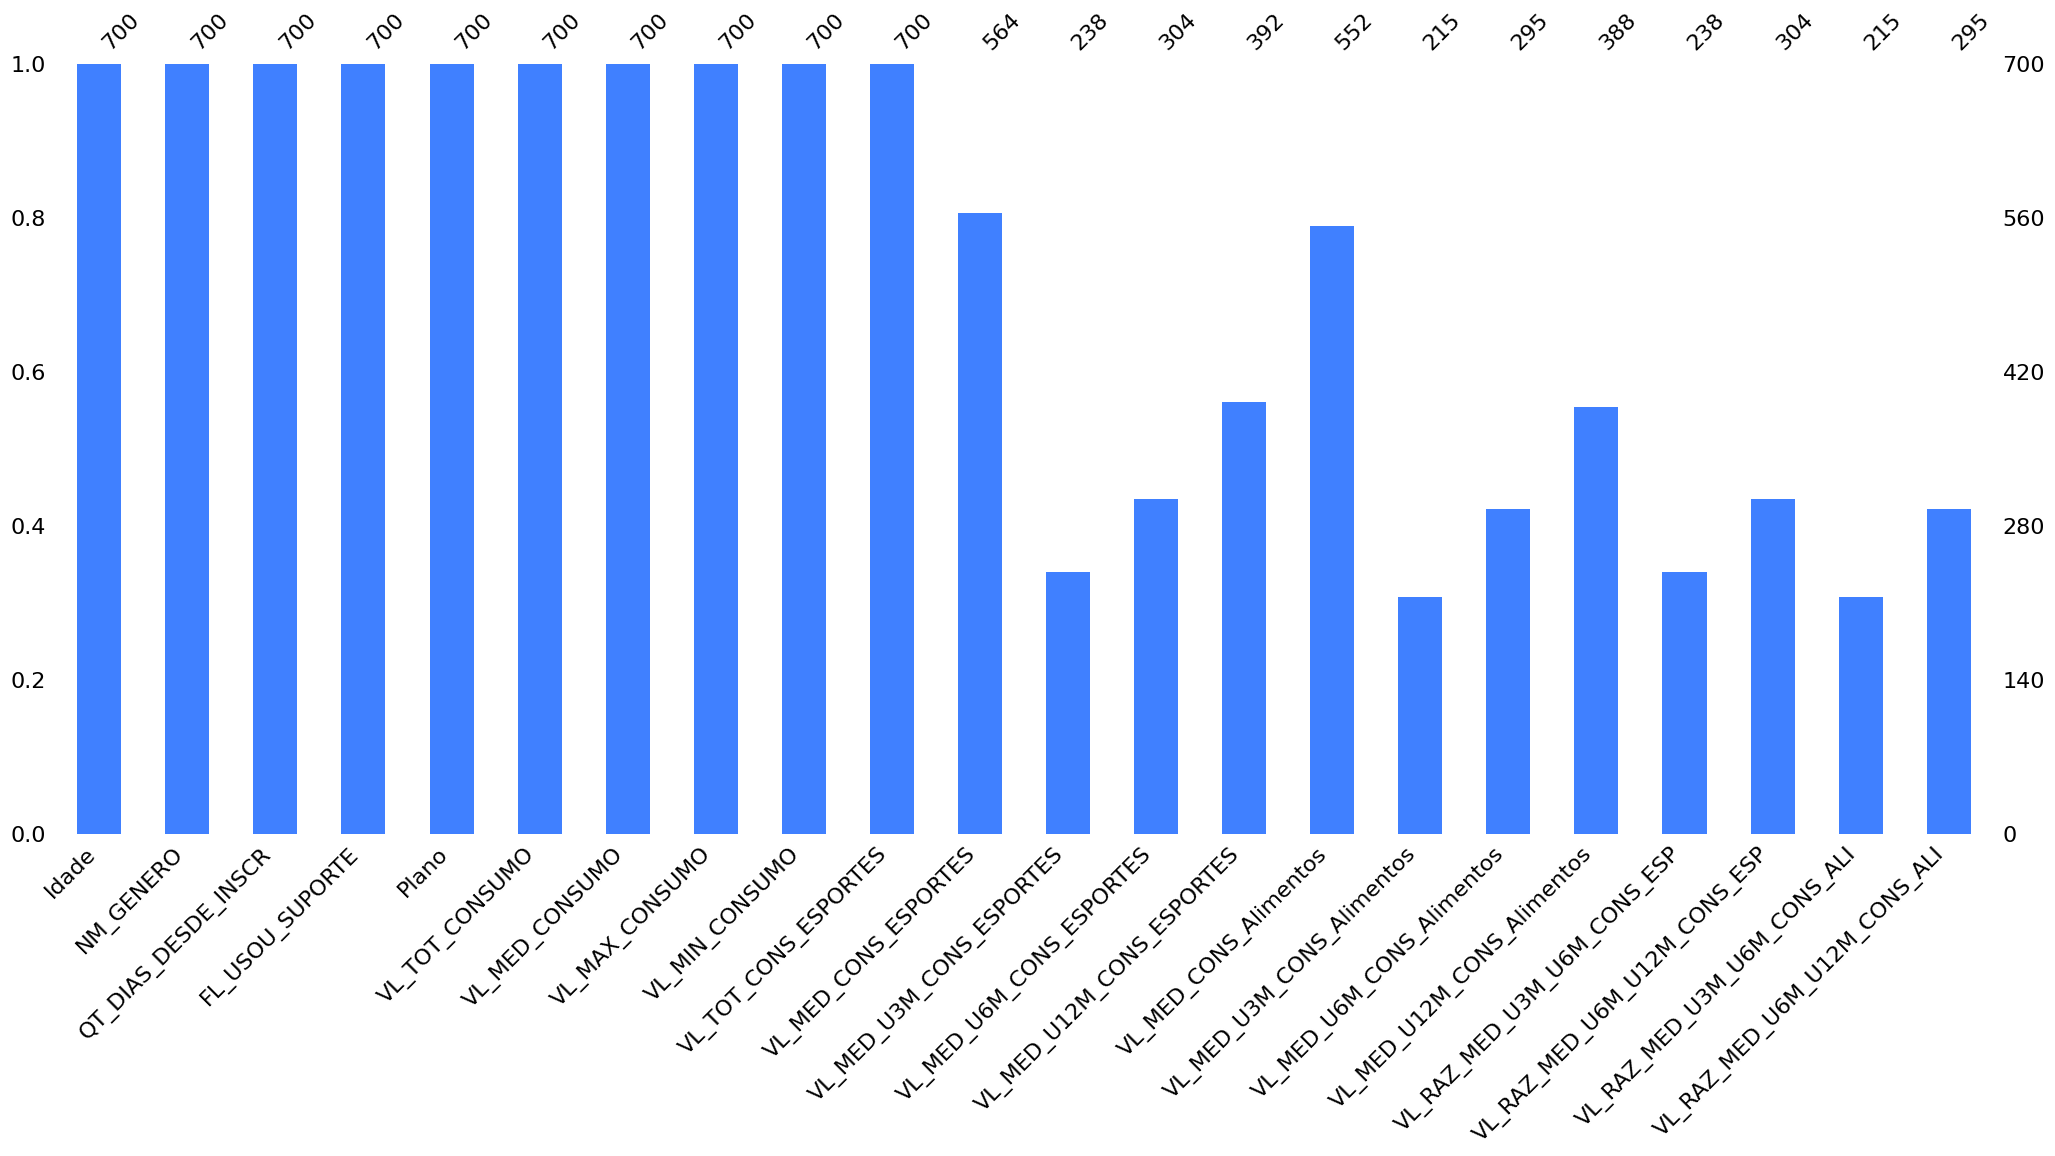

In [61]:
import missingno as msno
# msno.matrix(abt_01, color=(0.25, 0.5, 1))  # tom de azul claro
msno.bar(abt_01, color=(0.25, 0.5, 1))  # tom de azul claro


In [64]:
# Variáveis numéricas
# Filtrando o DataFrame
missing_cutoff = 70
df_numericas_drop_nulos = metadata_df[(metadata_df['percent_nulos'] >= missing_cutoff)]
lista_drop_nulos_numericas = list(df_numericas_drop_nulos.nome_variavel.values)
lista_drop_nulos_numericas

[]

In [65]:
# retirando lista de variáveis com alto percentual de nulos
abt_02 = abt_01.drop(axis=1,columns=lista_drop_nulos_numericas)
abt_02.shape

(700, 22)

In [66]:
# substituindo nulos pela média da variável numérica
abt_02 = abt_02.fillna(abt_02.select_dtypes(include=['float64', 'int64','int32']).mean())
abt_02.shape

(700, 22)

In [67]:
abt_02.head()

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,...,VL_MED_U6M_CONS_ESPORTES,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI
541,67,F,997,0,Intermediário,304.84,152.42,158.61,146.23,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915
440,55,F,1777,1,Intermediário,998.90,83.24,190.55,11.54,17.01,...,103.136382,17.010000,144.310000,190.550000,190.550000,190.550000,1.005672,1.001086,1.000000,1.000000
482,62,F,1721,1,Básico,1508.11,79.37,176.20,15.87,463.59,...,35.860000,35.860000,61.000000,105.673395,104.191525,104.449974,1.000000,1.000000,0.998279,1.000915
422,63,M,1690,0,Intermediário,430.84,107.71,143.14,61.42,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915
778,40,F,467,0,Avançado,364.08,91.02,189.14,9.01,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915


In [68]:
# substituindo nulos por "Desconhecido" para categóricas
categorical_cols = abt_02.select_dtypes(include=['object']).columns
abt_02[categorical_cols] = abt_02[categorical_cols].fillna('Desconhecido')
abt_02.shape

(700, 22)

In [69]:
abt_02.head()

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,...,VL_MED_U6M_CONS_ESPORTES,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI
541,67,F,997,0,Intermediário,304.84,152.42,158.61,146.23,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915
440,55,F,1777,1,Intermediário,998.90,83.24,190.55,11.54,17.01,...,103.136382,17.010000,144.310000,190.550000,190.550000,190.550000,1.005672,1.001086,1.000000,1.000000
482,62,F,1721,1,Básico,1508.11,79.37,176.20,15.87,463.59,...,35.860000,35.860000,61.000000,105.673395,104.191525,104.449974,1.000000,1.000000,0.998279,1.000915
422,63,M,1690,0,Intermediário,430.84,107.71,143.14,61.42,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915
778,40,F,467,0,Avançado,364.08,91.02,189.14,9.01,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915


<Axes: >

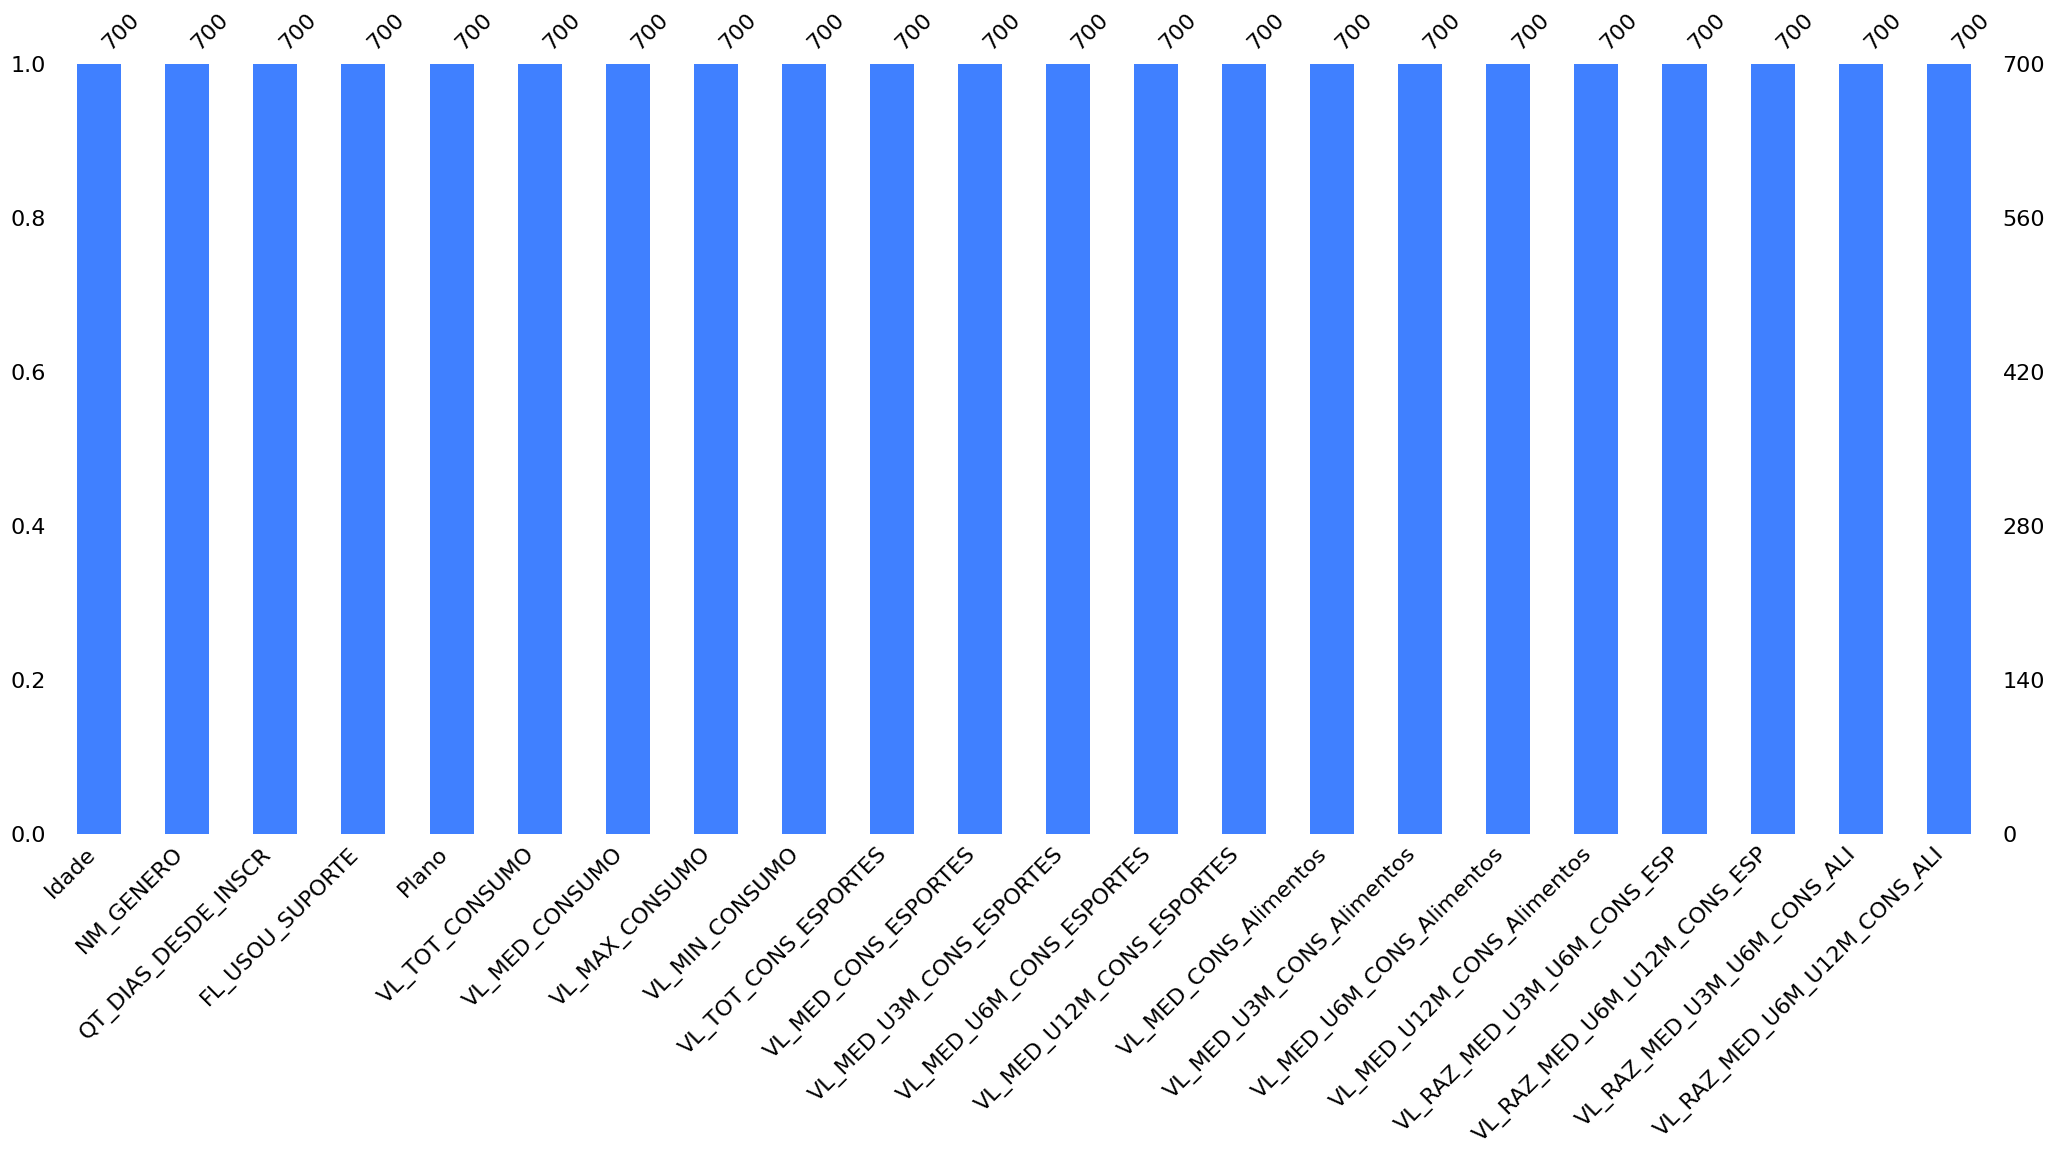

In [ ]:
msno.bar(abt_02, color=(0.25, 0.5, 1))  # tom de azul claro

In [70]:
# copiando dataframes para exemplos ludicos utilizando diferentes normalizações nos dados
abt_03 = abt_02.copy()
abt_04 = abt_02.copy()
abt_05 = abt_02.copy()

## Tratamento das Variáveis Numéricas - Normalização

A normalização é uma técnica usada para reescalar valores de uma variável para que eles fiquem dentro de um intervalo específico, geralmente entre 0 e 1. A equação para normalização é:

$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$

Onde:

- $ X $ é o valor atual que você deseja normalizar.
- $ X_{\text{min}} $ é o valor mínimo da característica no conjunto de dados.
- $ X_{\text{max}} $ é o valor máximo da característica no conjunto de dados.
- $ X_{\text{norm}} $ é o valor normalizado de $ X $.

Quando você aplica essa fórmula, garante que $ X_{\text{norm}} $ estará no intervalo [0,1]. Se você quiser normalizar em um intervalo diferente, como [a,b], pode ajustar a fórmula conforme necessário.

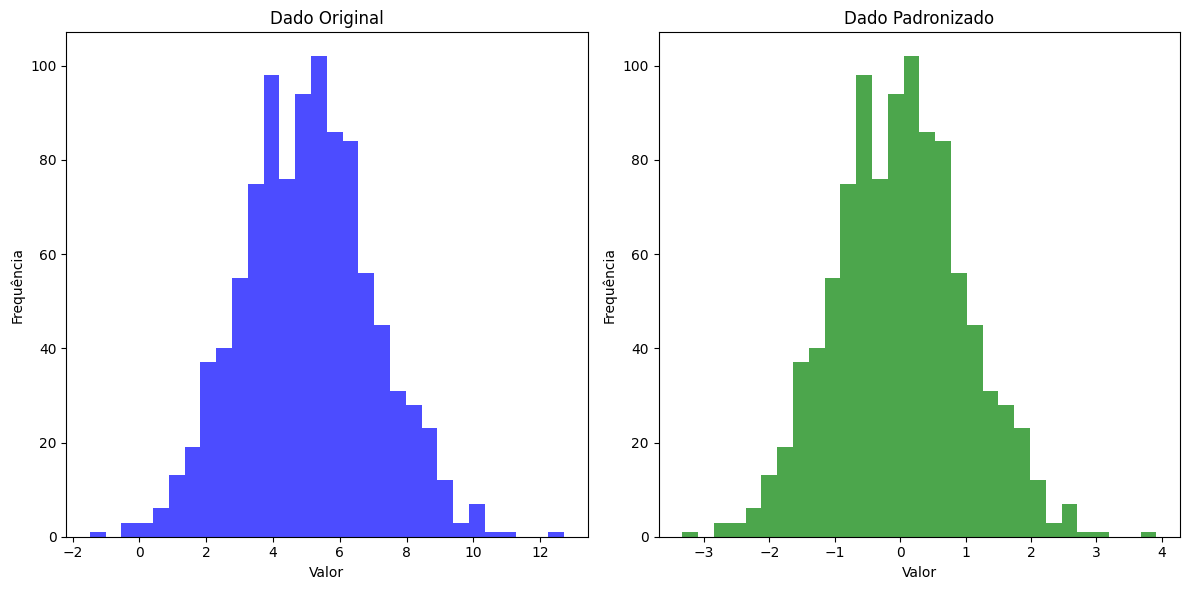

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Definindo uma semente para reprodutibilidade
np.random.seed(42)

# Gerando dados com distribuição aproximadamente normal
# com média 5 e desvio padrão 2
data = 5 + 2 * np.random.randn(1000)

# Padronizando os dados
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Visualizando as distribuições
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original data
ax[0].hist(data, bins=30, color='blue', alpha=0.7)
ax[0].set_title("Dado Original")
ax[0].set_xlabel("Valor")
ax[0].set_ylabel("Frequência")

# Standardized data
ax[1].hist(data_standardized, bins=30, color='green', alpha=0.7)
ax[1].set_title("Dado Padronizado")
ax[1].set_xlabel("Valor")
ax[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()


In [71]:
# Forma artesanal - implementando a formula na mão
numeric_cols = abt_02.select_dtypes(include=['float64', 'int64','int32']).columns
abt_02[numeric_cols] = abt_02[numeric_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
abt_02.head()

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,...,VL_MED_U6M_CONS_ESPORTES,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI
541,0.960784,F,0.547253,0.0,Intermediário,0.112101,0.736069,0.761995,0.728723,0.000000,...,0.506475,0.496023,0.507888,0.512698,0.504997,0.509298,0.419268,0.491668,0.459772,0.442089
440,0.725490,F,0.975824,1.0,Intermediário,0.393056,0.342307,0.945748,0.033548,0.016190,...,0.506475,0.060848,0.715268,0.953799,0.953799,0.954076,0.419268,0.491668,0.460993,0.441624
482,0.862745,F,0.945055,1.0,Básico,0.599184,0.320280,0.863192,0.055897,0.441229,...,0.158379,0.158379,0.284370,0.512698,0.504997,0.509298,0.415584,0.491018,0.459772,0.442089
422,0.882353,M,0.928022,0.0,Intermediário,0.163106,0.481587,0.672995,0.290994,0.000000,...,0.506475,0.496023,0.507888,0.512698,0.504997,0.509298,0.419268,0.491668,0.459772,0.442089
778,0.431373,F,0.256044,0.0,Avançado,0.136081,0.386590,0.937637,0.020490,0.000000,...,0.506475,0.496023,0.507888,0.512698,0.504997,0.509298,0.419268,0.491668,0.459772,0.442089


In [ ]:
abt_03.head()

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,...,VL_MED_U6M_CONS_ESPORTES,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI
541,67,F,997,0,Intermediário,304.84,152.42,158.61,146.23,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915
440,55,F,1777,1,Intermediário,998.90,83.24,190.55,11.54,17.01,...,103.136382,17.010000,144.310000,190.550000,190.550000,190.550000,1.005672,1.001086,1.000000,1.000000
482,62,F,1721,1,Básico,1508.11,79.37,176.20,15.87,463.59,...,35.860000,35.860000,61.000000,105.673395,104.191525,104.449974,1.000000,1.000000,0.998279,1.000915
422,63,M,1690,0,Intermediário,430.84,107.71,143.14,61.42,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915
778,40,F,467,0,Avançado,364.08,91.02,189.14,9.01,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915


In [72]:
# utilizando sklearn (recomendado - não reinventar a roda)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Instanciando o scaler
scaler = MinMaxScaler()

# Selecionando colunas numéricas
numeric_cols = abt_03.select_dtypes(include=['float64', 'int64','int32']).columns

# Aplicando a normalização
abt_03[numeric_cols] = scaler.fit_transform(abt_03[numeric_cols])
abt_03.shape

(700, 22)

In [73]:
abt_03.head()

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,...,VL_MED_U6M_CONS_ESPORTES,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI
541,0.960784,F,0.547253,0.0,Intermediário,0.112101,0.736069,0.761995,0.728723,0.000000,...,0.506475,0.496023,0.507888,0.512698,0.504997,0.509298,0.419268,0.491668,0.459772,0.442089
440,0.725490,F,0.975824,1.0,Intermediário,0.393056,0.342307,0.945748,0.033548,0.016190,...,0.506475,0.060848,0.715268,0.953799,0.953799,0.954076,0.419268,0.491668,0.460993,0.441624
482,0.862745,F,0.945055,1.0,Básico,0.599184,0.320280,0.863192,0.055897,0.441229,...,0.158379,0.158379,0.284370,0.512698,0.504997,0.509298,0.415584,0.491018,0.459772,0.442089
422,0.882353,M,0.928022,0.0,Intermediário,0.163106,0.481587,0.672995,0.290994,0.000000,...,0.506475,0.496023,0.507888,0.512698,0.504997,0.509298,0.419268,0.491668,0.459772,0.442089
778,0.431373,F,0.256044,0.0,Avançado,0.136081,0.386590,0.937637,0.020490,0.000000,...,0.506475,0.496023,0.507888,0.512698,0.504997,0.509298,0.419268,0.491668,0.459772,0.442089


## Padronização

A padronização, também conhecida como z-score normalization, é um processo de reescalação que transforma as variáveis para ter média $ \mu = 0 $ e desvio padrão $ \sigma = 1 $.

A equação para a padronização é:

$
Z = \frac{X - \mu}{\sigma}
$

Onde:
- $ Z $ é o valor padronizado.
- $ X $ é o valor original.
- $ \mu $ é a média da característica.
- $ \sigma $ é o desvio padrão da característica.

In [74]:
abt_04.head()

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,...,VL_MED_U6M_CONS_ESPORTES,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI
541,67,F,997,0,Intermediário,304.84,152.42,158.61,146.23,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915
440,55,F,1777,1,Intermediário,998.90,83.24,190.55,11.54,17.01,...,103.136382,17.010000,144.310000,190.550000,190.550000,190.550000,1.005672,1.001086,1.000000,1.000000
482,62,F,1721,1,Básico,1508.11,79.37,176.20,15.87,463.59,...,35.860000,35.860000,61.000000,105.673395,104.191525,104.449974,1.000000,1.000000,0.998279,1.000915
422,63,M,1690,0,Intermediário,430.84,107.71,143.14,61.42,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915
778,40,F,467,0,Avançado,364.08,91.02,189.14,9.01,0.00,...,103.136382,101.116301,104.215127,105.673395,104.191525,104.449974,1.005672,1.001086,0.998279,1.000915


In [75]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Instanciando o scaler
scaler = StandardScaler()

# Ajustando e transformando os dados

# Selecionando colunas numéricas
numeric_cols = abt_04.select_dtypes(include=['float64', 'int64','int32']).columns

# Aplicando a normalização
abt_04[numeric_cols] = scaler.fit_transform(abt_04[numeric_cols])
abt_04.shape

(700, 22)

In [76]:
abt_04.head()

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,...,VL_MED_U6M_CONS_ESPORTES,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI
541,1.583371,F,0.135225,-1.049811,Intermediário,-1.245930,2.150143,-0.548968,3.586516,-1.122017,...,-8.394527e-16,0.000000,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000
440,0.785320,F,1.646397,0.952553,Intermediário,-0.060821,-0.875874,0.515401,-0.627463,-1.032620,...,-8.394527e-16,-2.252893,1.088852e+00,2.793175,2.469178e+00,2.291702e+00,0.000000,1.653675e-15,0.024635,-0.005813
482,1.250849,F,1.537903,0.952553,Básico,0.808657,-1.045152,0.037201,-0.491992,1.314406,...,-1.987049e+00,-1.747972,-1.173588e+00,0.000000,8.126389e-16,-3.782467e-16,-0.058542,-8.084448e-03,0.000000,0.000000
422,1.317354,M,1.477843,-1.049811,Intermediário,-1.030785,0.194473,-1.064490,0.933108,-1.122017,...,-8.394527e-16,0.000000,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000
778,-0.212243,F,-0.891597,-1.049811,Avançado,-1.144778,-0.535567,0.468414,-0.706618,-1.122017,...,-8.394527e-16,0.000000,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000


## Tratamento das variáveis categóricas - Dummys

- Variáveis de baixa cardinalidade
- cardinalidade <= 10 (este valor de corte pode ser ajustado)

In [ ]:
abt_04 = abt_02.copy()

In [ ]:
abt_04[['NM_GENERO','Plano']].head()

,NM_GENERO,Plano
541,F,Intermediário
440,F,Intermediário
482,F,Básico
422,M,Intermediário
778,F,Avançado


In [77]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

card_cutoff = 2
df_categ_onehot = metadata_df[(metadata_df['cardinalidade'] <= card_cutoff) & (metadata_df['tipo'] == 'object')]
lista_onehot = list(df_categ_onehot.nome_variavel.values)
print('Lista de vars para OneHot Encoding: ',lista_onehot)

# Instanciando o encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicando o one-hot encoding
encoded_data = encoder.fit_transform(abt_04[lista_onehot])

# Criando um DataFrame com as colunas codificadas, mantendo o índice original
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=abt_04.index)

# Concatenando o DataFrame codificado com o DataFrame original
abt_04 = pd.concat([abt_04.drop(lista_onehot, axis=1), encoded_df], axis=1)

abt_04.head()


Lista de vars para OneHot Encoding:  ['NM_GENERO']


,Idade,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,VL_MED_CONS_ESPORTES,...,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI,NM_GENERO_M
541,1.583371,0.135225,-1.049811,Intermediário,-1.245930,2.150143,-0.548968,3.586516,-1.122017,3.789065e-16,...,0.000000,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000,0.0
440,0.785320,1.646397,0.952553,Intermediário,-0.060821,-0.875874,0.515401,-0.627463,-1.032620,-2.245567e+00,...,-2.252893,1.088852e+00,2.793175,2.469178e+00,2.291702e+00,0.000000,1.653675e-15,0.024635,-0.005813,0.0
482,1.250849,1.537903,0.952553,Básico,0.808657,-1.045152,0.037201,-0.491992,1.314406,-6.388440e-01,...,-1.747972,-1.173588e+00,0.000000,8.126389e-16,-3.782467e-16,-0.058542,-8.084448e-03,0.000000,0.000000,0.0
422,1.317354,1.477843,-1.049811,Intermediário,-1.030785,0.194473,-1.064490,0.933108,-1.122017,3.789065e-16,...,0.000000,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000,1.0
778,-0.212243,-0.891597,-1.049811,Avançado,-1.144778,-0.535567,0.468414,-0.706618,-1.122017,3.789065e-16,...,0.000000,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000,0.0


## Tratamento das variáveis categóricas de alta cardinalidade

In [78]:
card_cutoff = 2
df_categ_labelenc = metadata_df[(metadata_df['cardinalidade'] > card_cutoff) & (metadata_df['tipo'] == 'object')]
lista_lenc = list(df_categ_labelenc.nome_variavel.values)
print('Lista de vars para Label Encoding: ',lista_lenc)

Lista de vars para Label Encoding:  ['Plano']


In [79]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Aplicando LabelEncoder nas colunas desejadas
for col in lista_lenc:
    encoder = LabelEncoder()
    abt_04[col] = encoder.fit_transform(abt_04[col])

abt_04.head()


,Idade,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,VL_MED_CONS_ESPORTES,...,VL_MED_U12M_CONS_ESPORTES,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI,NM_GENERO_M
541,1.583371,0.135225,-1.049811,2,-1.245930,2.150143,-0.548968,3.586516,-1.122017,3.789065e-16,...,0.000000,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000,0.0
440,0.785320,1.646397,0.952553,2,-0.060821,-0.875874,0.515401,-0.627463,-1.032620,-2.245567e+00,...,-2.252893,1.088852e+00,2.793175,2.469178e+00,2.291702e+00,0.000000,1.653675e-15,0.024635,-0.005813,0.0
482,1.250849,1.537903,0.952553,1,0.808657,-1.045152,0.037201,-0.491992,1.314406,-6.388440e-01,...,-1.747972,-1.173588e+00,0.000000,8.126389e-16,-3.782467e-16,-0.058542,-8.084448e-03,0.000000,0.000000,0.0
422,1.317354,1.477843,-1.049811,2,-1.030785,0.194473,-1.064490,0.933108,-1.122017,3.789065e-16,...,0.000000,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000,1.0
778,-0.212243,-0.891597,-1.049811,0,-1.144778,-0.535567,0.468414,-0.706618,-1.122017,3.789065e-16,...,0.000000,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000,0.0


## Compondo a ABT tratada
- Trazendo Target

In [80]:
# Inner join usando o índice
abt_model = pd.merge(abt_04, abt_00[['Churn']], left_index=True, right_index=True, how='inner')
abt_model.shape


(700, 23)

In [81]:
abt_model.head()


,Idade,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,VL_TOT_CONSUMO,VL_MED_CONSUMO,VL_MAX_CONSUMO,VL_MIN_CONSUMO,VL_TOT_CONS_ESPORTES,VL_MED_CONS_ESPORTES,...,VL_MED_CONS_Alimentos,VL_MED_U3M_CONS_Alimentos,VL_MED_U6M_CONS_Alimentos,VL_MED_U12M_CONS_Alimentos,VL_RAZ_MED_U3M_U6M_CONS_ESP,VL_RAZ_MED_U6M_U12M_CONS_ESP,VL_RAZ_MED_U3M_U6M_CONS_ALI,VL_RAZ_MED_U6M_U12M_CONS_ALI,NM_GENERO_M,Churn
541,1.583371,0.135225,-1.049811,2,-1.245930,2.150143,-0.548968,3.586516,-1.122017,3.789065e-16,...,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000,0.0,0
440,0.785320,1.646397,0.952553,2,-0.060821,-0.875874,0.515401,-0.627463,-1.032620,-2.245567e+00,...,1.088852e+00,2.793175,2.469178e+00,2.291702e+00,0.000000,1.653675e-15,0.024635,-0.005813,0.0,0
482,1.250849,1.537903,0.952553,1,0.808657,-1.045152,0.037201,-0.491992,1.314406,-6.388440e-01,...,-1.173588e+00,0.000000,8.126389e-16,-3.782467e-16,-0.058542,-8.084448e-03,0.000000,0.000000,0.0,0
422,1.317354,1.477843,-1.049811,2,-1.030785,0.194473,-1.064490,0.933108,-1.122017,3.789065e-16,...,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000,1.0,1
778,-0.212243,-0.891597,-1.049811,0,-1.144778,-0.535567,0.468414,-0.706618,-1.122017,3.789065e-16,...,3.859226e-16,0.000000,8.126389e-16,-3.782467e-16,0.000000,1.653675e-15,0.000000,0.000000,0.0,1
